## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv', sep =',')
internet_df = pd.read_csv('/datasets/megaline_internet.csv', sep=',')
messages_df = pd.read_csv('/datasets/megaline_messages.csv', sep=',')
plans_df = pd.read_csv('/datasets/megaline_plans.csv', sep=',')
users_df = pd.read_csv('/datasets/megaline_users.csv', sep= ',')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R/ Los datos están organizados en 15 columnas y dos filas: 0 y 1. Probablemente estén describiendo la información sobre los dos tipos de planes que tienen, surf y ultimate, lo cual incluye los mensajes, megabytes por mes, mensajes incluidos, precio en usd, etc. Salen como tipo de objetos int, exceptuando la columna 5 y 6 que salen como float y la 7 que sale como object. Además, salen datos non-null.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans_df.duplicated().sum()
plans_df.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

R/ Considero que por el momento, la información suministrada es lo suficientemente útil.

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R/ Por lo que puedo ver, no hay problemas evidentes en los datos. Los datos parecen del tipo correcto, con la posible excepción de reg_date y churn_date, que podríamos convertir a formato datatime. No encontré valores duplicados y utilicé .unique para confirmar que no hubiera variaciones en los tipos de planes. Hay datos ausentes en churn_date, pero eso es esperable debido a que esa columna solo registra las fechas en la que los usuarios abandonaron su plan. Si no lo han abandonado, no aparecerá un registro de fecha. Quizá valga la pena crear otra columna donde informe si los usuarios están activos o no.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
# Crear columna 'is_active' para identificar usuarios activos
users_df['is_active'] = users_df['churn_date'].isna()
print("Columnas actuales:", users_df.columns.tolist()) 

Columnas actuales: ['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'is_active']


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R/ Aquí tenemos grandes volúmenes de datos, específicamente, 137.735 filas y 4 columnas. Los datos parecen del tipo correcto, con la posible excepción de call_date que podría convertir a formato datatime. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

R/ No encuentro factores adicionales que puedan enriquecer el DataFrame. Creo que está completo.

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes
messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R/ El DF está conformado por 3 columnas y 76.051 filas Los datos de date pueden cambiarse a otro formatos (datetime, respectivamente). No encontré valores duplicados o nulos inadecuados. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
# Extraer componentes de fecha
messages_df['message_year'] = messages_df['message_date'].dt.year
messages_df['message_month'] = messages_df['message_date'].dt.month
messages_df['message_day'] = messages_df['message_date'].dt.day
messages_df['message_hour'] = messages_df['message_date'].dt.hour
messages_df['day_of_week'] = messages_df['message_date'].dt.dayofweek  # 0=Lunes, 6=Domingo
messages_df['is_weekend'] = messages_df['day_of_week'].isin([5, 6]).astype(int)

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R/ En este DF se encuentran 4 columnas 104.825 entradas (filas). Los objetos parecen del tipo correcto, excepto session_date. Podría ser útil segmentar los datos basados en tipos de usarios con base en el poco o mucho uso del internet. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
# 1. Primero creamos user_stats
user_stats = internet_df.groupby('user_id').agg(
    total_sessions=('id', 'count'),
    total_mb_used=('mb_used', 'sum'),
    avg_mb_per_session=('mb_used', 'mean'),
    first_session=('session_date', 'min'),
    last_session=('session_date', 'max')
).reset_index()

# 2. Ahora podemos crear los segmentos
user_stats['user_segment'] = pd.qcut(user_stats['total_mb_used'],
                                   q=[0, 0.25, 0.75, 1],
                                   labels=['light_user', 'medium_user', 'heavy_user'])

# 3. Unimos al DataFrame original
internet_df = internet_df.merge(user_stats, on='user_id')

# 4. Continuamos con el resto de transformaciones
internet_df['session_hour'] = internet_df['session_date'].dt.hour
internet_df['time_of_day'] = pd.cut(internet_df['session_hour'],
                                  bins=[0, 6, 12, 18, 24],
                                  labels=['night', 'morning', 'afternoon', 'evening'],
                                  right=False)

# Verificación
print(internet_df[['user_id', 'total_mb_used', 'user_segment', 'time_of_day']].head())

   user_id  total_mb_used user_segment time_of_day
0     1000        1901.47   light_user       night
1     1000        1901.47   light_user       night
2     1000        1901.47   light_user       night
3     1000        1901.47   light_user       night
4     1000        1901.47   light_user       night


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan clara
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [22]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_df['month'] = calls_df['call_date'].dt.to_period('M')
messages_df['month'] = messages_df['message_date'].dt.to_period('M')
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

monthly_calls = calls_df.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns={'id': 'calls_count'}).reset_index()
print(monthly_calls)

      user_id    month  calls_count
0        1000  2018-12           16
1        1001  2018-08           27
2        1001  2018-09           49
3        1001  2018-10           65
4        1001  2018-11           64
...       ...      ...          ...
2253     1498  2018-12           39
2254     1499  2018-09           41
2255     1499  2018-10           53
2256     1499  2018-11           45
2257     1499  2018-12           65

[2258 rows x 3 columns]


In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_df['rounded_minutes'] = np.ceil(calls_df['duration'])
monthly_minutes = calls_df.groupby(['user_id', 'month'])['rounded_minutes'].sum().reset_index().rename(columns ={'rounded_minutes': 'minutes_used'}) 

monthly_minutes['minutes_used'] = monthly_minutes['minutes_used'].astype(int)
print(monthly_minutes)


      user_id    month  minutes_used
0        1000  2018-12           124
1        1001  2018-08           182
2        1001  2018-09           315
3        1001  2018-10           393
4        1001  2018-11           426
...       ...      ...           ...
2253     1498  2018-12           339
2254     1499  2018-09           346
2255     1499  2018-10           385
2256     1499  2018-11           308
2257     1499  2018-12           496

[2258 rows x 3 columns]


In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages = messages_df.groupby(['user_id', 'month']).agg({'id':'count'}).rename(columns={'id':'messages_count'}).reset_index()
print(monthly_messages) 

      user_id    month  messages_count
0        1000  2018-12              11
1        1001  2018-08              30
2        1001  2018-09              44
3        1001  2018-10              53
4        1001  2018-11              36
...       ...      ...             ...
1801     1496  2018-09              21
1802     1496  2018-10              18
1803     1496  2018-11              13
1804     1496  2018-12              11
1805     1497  2018-12              50

[1806 rows x 3 columns]


In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

monthly_internet = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
print(monthly_internet)

      user_id    month   mb_used
0        1000  2018-12   1901.47
1        1001  2018-08   6919.15
2        1001  2018-09  13314.82
3        1001  2018-10  22330.49
4        1001  2018-11  18504.30
...       ...      ...       ...
2272     1498  2018-12  23137.69
2273     1499  2018-09  12984.76
2274     1499  2018-10  19492.43
2275     1499  2018-11  16813.83
2276     1499  2018-12  22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
from functools import reduce

dfs = [monthly_calls, monthly_minutes, monthly_messages, monthly_internet]
monthly_usage = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'month'], how='outer'), dfs)

# Rellena con 0 los valores faltantes
monthly_usage.fillna(0, inplace=True)
monthly_usage = monthly_usage.astype({'calls_count': int, 'minutes_used': int, 'messages_count': int})
print(monthly_usage)

      user_id    month  calls_count  minutes_used  messages_count   mb_used
0        1000  2018-12           16           124              11   1901.47
1        1001  2018-08           27           182              30   6919.15
2        1001  2018-09           49           315              44  13314.82
3        1001  2018-10           65           393              53  22330.49
4        1001  2018-11           64           426              36  18504.30
...       ...      ...          ...           ...             ...       ...
2288     1349  2018-12            0             0              61  13039.91
2289     1361  2018-05            0             0               2   1519.69
2290     1482  2018-10            0             0               2      0.00
2291     1108  2018-12            0             0               0    233.17
2292     1311  2018-06            0             0               0   1498.83

[2293 rows x 6 columns]


In [27]:
# Añade la información de la tarifa
monthly_usage = monthly_usage.merge(users_df[['user_id', 'plan']], on='user_id')

monthly_usage = monthly_usage.merge(plans_df, left_on='plan', right_on='plan_name')
print(monthly_usage)

      user_id    month  calls_count  minutes_used  messages_count   mb_used  \
0        1000  2018-12           16           124              11   1901.47   
1        1006  2018-11            2            10              15   2068.37   
2        1006  2018-12            9            59             139  32118.82   
3        1008  2018-10           71           476              21  17106.99   
4        1008  2018-11           63           446              37  23676.72   
...       ...      ...          ...           ...             ...       ...   
2288     1194  2018-11            0             0              62  42866.10   
2289     1194  2018-12            0             0              56  31088.49   
2290     1349  2018-10            0             0              76  13093.55   
2291     1349  2018-11            0             0              72  17128.26   
2292     1349  2018-12            0             0              61  13039.91   

          plan  messages_included  mb_per_month_inc

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [28]:
# Calcula el ingreso mensual para cada usuario
# Minutos extra
monthly_usage['extra_minutes'] = monthly_usage['minutes_used'] - monthly_usage['minutes_included']
monthly_usage['extra_minutes'] = monthly_usage['extra_minutes'].clip(lower=0)

# SMS extra
monthly_usage['extra_messages'] = monthly_usage['messages_count'] - monthly_usage['messages_included']
monthly_usage['extra_messages'] = monthly_usage['extra_messages'].clip(lower=0)

# Datos extra (en MB -> GB)
monthly_usage['extra_mb'] = monthly_usage['mb_used'] - monthly_usage['mb_per_month_included']
monthly_usage['extra_mb'] = monthly_usage['extra_mb'].clip(lower=0)
monthly_usage['extra_gb'] = np.ceil(monthly_usage['extra_mb'] / 1024)

# Calcula ingresos (CORRECCIÓN: usar usd_monthly_pay en lugar de usd_monthly_fee)
monthly_usage['monthly_revenue'] = (
    monthly_usage['usd_monthly_pay'] +
    monthly_usage['extra_minutes'] * monthly_usage['usd_per_minute'] +
    monthly_usage['extra_messages'] * monthly_usage['usd_per_message'] +
    monthly_usage['extra_gb'] * monthly_usage['usd_per_gb']
)
print(monthly_usage)

      user_id    month  calls_count  minutes_used  messages_count   mb_used  \
0        1000  2018-12           16           124              11   1901.47   
1        1006  2018-11            2            10              15   2068.37   
2        1006  2018-12            9            59             139  32118.82   
3        1008  2018-10           71           476              21  17106.99   
4        1008  2018-11           63           446              37  23676.72   
...       ...      ...          ...           ...             ...       ...   
2288     1194  2018-11            0             0              62  42866.10   
2289     1194  2018-12            0             0              56  31088.49   
2290     1349  2018-10            0             0              76  13093.55   
2291     1349  2018-11            0             0              72  17128.26   
2292     1349  2018-12            0             0              61  13039.91   

          plan  messages_included  mb_per_month_inc

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

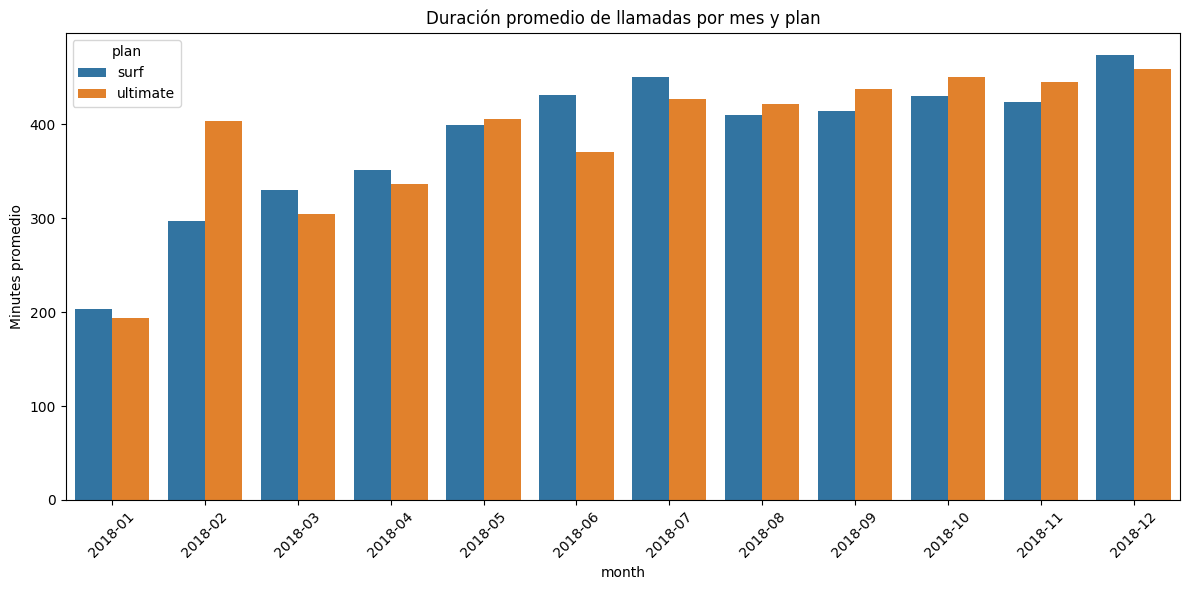

In [29]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupamos por plan y mes
calls_stats = monthly_usage.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=calls_stats, x='month', y='minutes_used', hue='plan')
plt.title('Duración promedio de llamadas por mes y plan')
plt.ylabel('Minutes promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

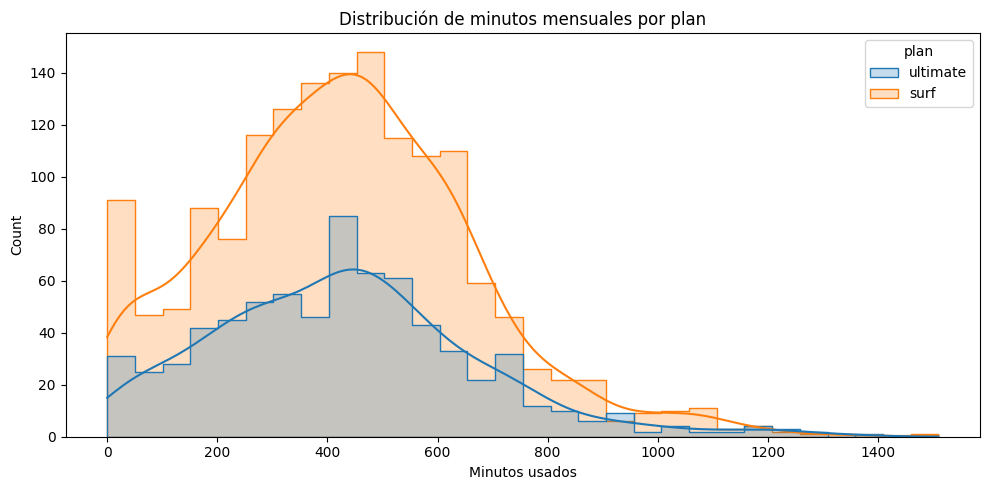

In [30]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(10, 5))
sns.histplot(data=monthly_usage, x='minutes_used', hue='plan', element='step', bins=30, kde=True)
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos usados')
plt.tight_layout()
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_stats_summary = monthly_usage.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()
print(call_stats_summary)


       plan        mean           var
0      surf  428.749523  54968.279461
1  ultimate  430.450000  57844.464812


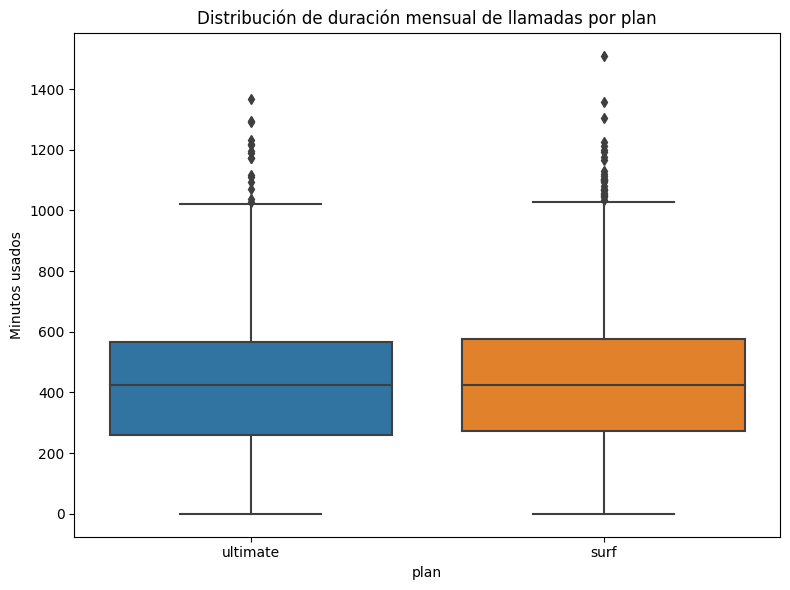

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(8, 6))
sns.boxplot(data=monthly_usage, x='plan', y='minutes_used')
plt.title('Distribución de duración mensual de llamadas por plan')
plt.ylabel('Minutos usados')
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

R/ El primer gráfico muestra el promedio por mes, el segundo la frecuencia de usuarios, y el tercero los percentiles. Cada una revela aspectos distintos. Los datos revelan que el plan Surf tiene un comportamiento predecible, con la mayoría de usuarios agrupados cerca de su límite de 500 minutos (ventaja: facilita la gestión de recursos y costos), mientras que Ultimate atrae a usuarios con necesidades variables, desde bajos consumos hasta outliers cercanos a los 3000 minutos (ventaja: capta segmentos de alto valor y potencial para upselling). Se podría esperar que los usuarios Ultimate tuvieran un consumo pronunciadamente mayor que Surf, sin embargo, esto no necesariamente se cumple con la información basada en los datos. Sin embargo, el pico cercano al límite en Surf sugiere que muchos usuarios podrían estar listos para migrar a un plan superior, y la alta dispersión en Ultimate indica oportunidades para personalizar paquetes (ej.: ofrecer un plan intermedio). Se recomienda ajustar los límites de Surf y segmentar mejor a los usuarios de Ultimate podría optimizar la rentabilidad global.

### Mensajes

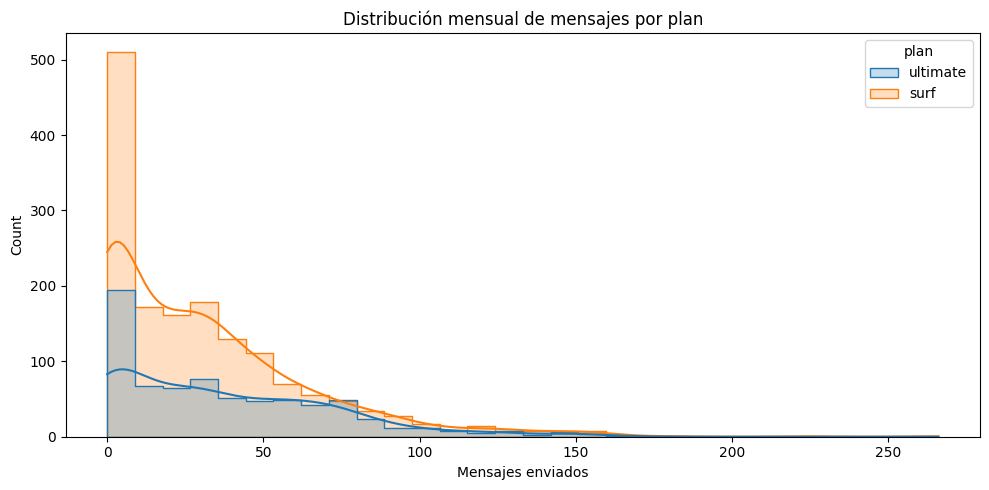

In [33]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(10, 5))
sns.histplot(data=monthly_usage, x='messages_count', hue='plan', element='step', bins=30, kde=True)
plt.title('Distribución mensual de mensajes por plan')
plt.xlabel('Mensajes enviados')
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

R/  El comportamiento de los usuarios es consistente con su tipo de plan. En el caso del uso de mensajes, hay una gran cantidad de usuarios Surf que prácticamente no utilizan los mensajes, mientras que hay una cantidad más consistente de uso de mensajes desde los usuarios Ultimate. Esto podría reflejar diferencias las necesidades en ambos tipos de usuarios, lo que permite optimizar y actualizar ofertas conforme a la demanda. 


### Internet

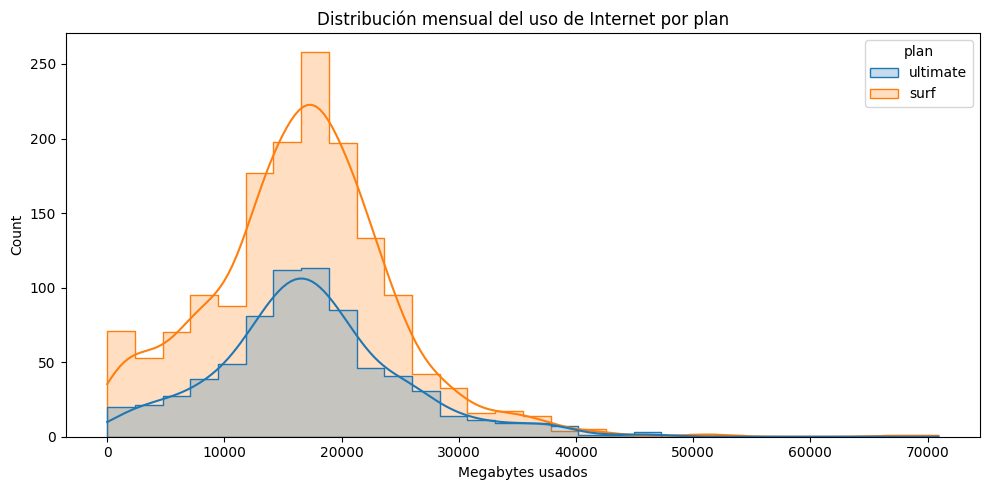

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(data=monthly_usage, x='mb_used', hue='plan', element='step', bins=30, kde=True)
plt.title('Distribución mensual del uso de Internet por plan')
plt.xlabel('Megabytes usados')
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

R/ En cuanto al uso del Internet, hay un pico mucho más elevado por parte de los usuarios Surf, lo que indica que estos pueden estar usando más el internet. La explicación de por qué más usuarios Ultimate pueden tener un consumo más moderado de internet puede ser dispar, posiblemente asociado al grupo etáreo, intereses o necesidades más idiosincrásicas de los usarios.

Por otro lado, la mayoría de usuarios Surf se ajustan al límite del plan, lo que sugiere que el paquete es adecuado para consumidores promedio, pero algunos podrían necesitar más datos (como indican los posibles excedentes en la cola derecha). En el caso de los usuarios Ultimate encontramos una distribución más dispersa y un pico menos definido. Esto podría indicar que el plan Ultimate atrae tanto a usuarios moderados como a "heavy users" (ej.: streamers, teletrabajadores).

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [35]:
income_stats = monthly_usage.groupby('plan')['monthly_revenue'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print(income_stats)


       plan       mean  median        std   min     max
0      surf  60.706408   40.36  55.388042  20.0  590.37
1  ultimate  72.313889   70.00  11.395108  70.0  182.00


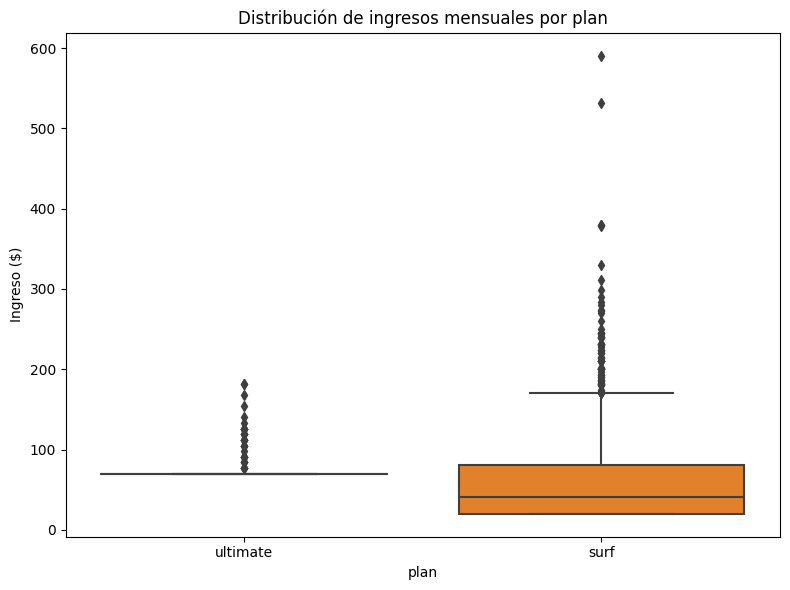

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=monthly_usage, x='plan', y='monthly_revenue')
plt.title('Distribución de ingresos mensuales por plan')
plt.ylabel('Ingreso ($)')
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

R/ El plan Surf ofrece unos ingresos manifiestamente inferiores al plan Ultimate, lo cual es esperable dado la diferencia de precios. Esto puede signficar que Surf es clave para captar a usuarios de bajo consumo (quizá estudiantes, jóvenes o planes individuales), pero ofrece la oportunidad de migrarlos a planes superiores con ajustes en los límites o los precios. Es posible maximizar la rentabilidad mediante procesos como: 1) optimizar la transición de Surf a Ultimate con incentivos, 2) ofrecer add-ons en Ultimate para usuarios que no consumen todo su límite, y 3) explorar un plan intermedio que capture a quienes necesitan más que Surf pero menos que Ultimate. 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H₀ (nula): No hay diferencia significativa en los ingresos promedio entre planes Ultimate y Surf.

H₁ (alternativa): Hay diferencia significativa.

Prueba: Prueba t de Student para muestras independientes.

α = 0.05

In [37]:

# Subconjuntos
ultimate_revenue = monthly_usage[monthly_usage['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = monthly_usage[monthly_usage['plan'] == 'surf']['monthly_revenue']

# Prueba t
t_stat, p_value = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

print(f'Estadístico t: {t_stat:.3f}, valor p: {p_value:.4f}')

if p_value < 0.05:
    print("Rechazamos H₀: Hay diferencia significativa entre los ingresos.")
else:
    print("No se rechaza H₀: No hay diferencia significativa entre los ingresos.")


Estadístico t: 7.952, valor p: 0.0000
Rechazamos H₀: Hay diferencia significativa entre los ingresos.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H₀: No hay diferencia en los ingresos promedio entre NY-NJ y otras regiones.

H₁: Sí hay diferencia.

α = 0.05

In [38]:
# Prueba las hipótesis
monthly_usage = monthly_usage.merge(users_df[['user_id', 'city']], on='user_id', how='left')

monthly_usage['region'] = monthly_usage['city'].apply(lambda x: 'NY-NJ' if 'NY-NJ' in str(x) else 'Other')
monthly_usage_clean = monthly_usage.dropna(subset=['monthly_revenue'])

# Separa los ingresos por región
ny_nj_revenue = monthly_usage_clean[monthly_usage_clean['region'] == 'NY-NJ']['monthly_revenue']
other_revenue = monthly_usage_clean[monthly_usage_clean['region'] == 'Other']['monthly_revenue']

t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Muestra los resultados
print(f'Estadístico t: {t_stat:.3f}, valor p: {p_value:.4f}')

if p_value < 0.05:
    print("Rechazamos H₀: Hay diferencia significativa entre los ingresos de NY-NJ y otras regiones.")
else:
    print("No se rechaza H₀: No hay diferencia significativa entre los ingresos.")


Estadístico t: -2.131, valor p: 0.0335
Rechazamos H₀: Hay diferencia significativa entre los ingresos de NY-NJ y otras regiones.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

CONCLUSIÓN GENERAL:

Se han encontrado diferencias estadísticamente significativas en el comportamiento de los usuarios según el tipo de plan que poseen. En primer lugar, se identificó que ambos tipos de usuarios pueden tener intereses distintos a la hora de obtener el servicio de Megaline, derivando esto de la variabilidad entre el uso de llamadas, internet y mensajes. En segundo lugar, se encontró que es probable que los usuarios de Surf es útil para captar usuarios de bajo consumo, mientras que Ultimate funciona para captar usuarios de alto consumo. Sin embargo, la tendencia de Surf a utilizar un poco más de internet puede indicar que es buen momento para Megaline para ofrecer un tercer servicio intermedio que funcione como apalancamiento para saltar a planes superiores. Esto puede tomar la forma de un plan personalizado para los usuarios Surf o una tercera categoría de plan con intereses intermedios.

Por otro lado, se encontró también diferencias entre los comportamientos de los ingresos según el tipo de plan. Primero, el plan Ultimate es la principal fuente de ingresos, siendo Surf una fuente de ingresos considerablemente inferior. Esto se entiende principalmente por la cantidad de usuarios y por la diferencia entre los precios. Segundo, se identificó que la región NY-NJ representa ingresos significativamente inferiores al resto de regiones. Se podrían hacer análisis adicionales para explorar las posibles causas de esta asimetría y así aumentar los ingresos de la región NY-NJ. 